In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist  # MNIST 데이터셋

# 데이터 다운로드 함수
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 이미지 픽셀 값을 0과 1사이로 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0


    
# 3. CNN 모델 정의
model = models.Sequential()  # 순차적 모델 선언

# 첫 번째 합성곱 계층: 필터 크기 3x3, 필터 수 32, 활성화 함수 ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# 풀링 계층: 2x2 크기로 다운샘플링
model.add(layers.MaxPooling2D((2, 2)))

# 두 번째 합성곱 계층: 필터 수 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 세 번째 합성곱 계층: 필터 수 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Fully Connected Layer를 연결하기 위해 Flatten 처리
model.add(layers.Flatten())

# Fully Connected Layer 1: 뉴런 수 64, 활성화 함수 ReLU
model.add(layers.Dense(64, activation='relu'))

# 출력층: 뉴런 수 10(클래스 수), 활성화 함수 Softmax
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # 다중클래스에서 주로 사용, 각 클래스별 확률 예측 및 손실계산
    metrics=['accuracy']
)

# 5. 모델 학습
history = model.fit(train_images, train_labels, epochs=30)

# 6. 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc:.4f}")

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7454 - loss: 0.6964
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8806 - loss: 0.3316
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8964 - loss: 0.2782
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9095 - loss: 0.2426
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9208 - loss: 0.2140
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9288 - loss: 0.1933
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9329 - loss: 0.1803
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9395 - loss: 0.1630
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9460 - loss: 0.1459
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9489 - loss: 0.1353
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9524 - loss: 0.1267
Epoch 12/30
1875/18

In [13]:
# 모델 저장
model.save('./model/cll_quiz_model.h5')
print("모델이 'cll_quiz_model.h5'로 저장되었습니다.")
# 학습이 오래 걸릴 수 있으므로 파일로 저장하여 필요할 때 로드시키기

모델이 'cll_quiz_model.h5'로 저장되었습니다.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


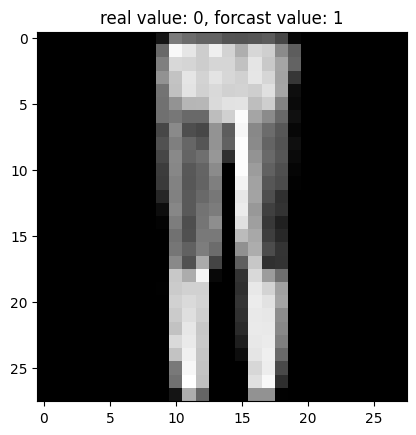

In [ ]:
# 테스트 데이터에서 첫 번째 샘플을 가져옴
model_path = './model/cll_quiz_model.h5'  # 저장된 모델 경로
loaded_model = models.load_model(model_path)

sample_image = test_images[3]   # 샘플 이미지 저장
sample_label = np.argmax(test_labels[3])
# test_labels[n] 배열에서 가장 큰 값을 가지는 요소의 인덱스를 찾아 sample_label 변수에 저장

# 모델로 예측 수행
predicted_label = np.argmax(loaded_model.predict(sample_image.reshape(1, 28, 28, 1)))

# 결과 출력
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"real value: {sample_label}, forcast value: {predicted_label}")
plt.show()